In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
#Fetching the data in df
df=pd.read_csv('cproducts.csv')
#Reading first 5 rows of the dataset
df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,20-10-1975,male,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,21-07-1955,female,NaN,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,19-03-1981,female,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,AD 399 FLAT LADIES JEANS FASHION EXC,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,10-05-1986,male,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,29-02-1988,male,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,NMP 5% OFF CONCEPT DISCOUNT 2655,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [3]:
#checking data types of all columns
df.dtypes

customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description              object
till_no                         int64
transaction_number_by_till      int64
promo_code                     object
promotion_description          object
product_code                  float64
product_description            object
sale_price_after_promo        float64
discountUsed                   object
dtype: object

In [4]:
#checking NULL values on each column
df.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

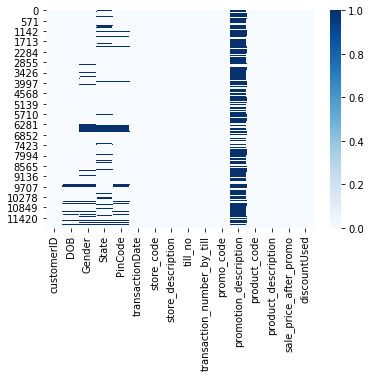

In [5]:
#Checking Null values by a graph on each column
sns.heatmap(df.isnull(),cmap="Blues");

In [6]:
#Checking the shape of the dataset
df.shape

(11972, 16)

In [7]:
#As there are 8510 null values out of 11972 rows in 'promotion_description'
#I am going to delete that row

#Dropping 'promotion_description'
df.drop(['promotion_description'],axis=1,inplace=True)

In [8]:
#Now we will check if this column is still present or not
df.tail() #details of last 5 rows

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed
11967,BBID_211461439,18-04-1973,male,JHARKHAND,831012.0,06-06-2017,4843,BB-JAMSHEDPUR-NH-33,9,72096,NONPROMO,1.080376e+08,SUGAR MEDIUM LOOSE,90.81,"BBSavingsClub,T24Club,BBProfitClub,Payback"
11968,BBID_211461453,10-12-1994,female,JHARKHAND,831018.0,19-04-2017,4843,BB-JAMSHEDPUR-NH-33,3,90594,1279705,1.000720e+12,"VIP Pulse SP Blue, 81 cm",4756.50,BBSavingsClub
11969,BBID_211461466,25-08-1959,female,JHARKHAND,832401.0,17-04-2017,4843,BB-JAMSHEDPUR-NH-33,5,6628,1268186,3.001963e+08,CLMT PHENYLS MILKY 2*1L,89.10,"BBSavingsClub,Payback"
11970,BBID_211461471,01-01-1955,NaN,JHARKHAND,831018.0,12-06-2017,4843,BB-JAMSHEDPUR-NH-33,5,22026,LOCALPROMO,1.080352e+08,TATA CTC TEA GOLD PP 250g,90.90,BBSavingsClub
11971,BBID_211461472,01-01-1985,male,JHARKHAND,831019.0,22-05-2017,4843,BB-JAMSHEDPUR-NH-33,9,68822,1268186,1.000118e+09,BOILED SWEET CORN PERI PERI MASALA,63.00,BBSavingsClub


In [9]:
#Now we will fill the NULL value rows on each column which has null value in it
df.DOB.fillna(-1,inplace=True) #Filling Null values with -1 of DOB column
df.Gender.fillna('No_Gender',inplace=True) #Filling Null Values with name 'No-Gender' of Gender column
df.State.fillna('No_State',inplace=True) #Filling Null Values with name 'No-State' of State Column
df.PinCode.fillna(1,inplace=True) #Filling Null Values with name 1 of Pincode Column

In [10]:
#Now recheck null values of each coulmn
df.isnull().sum()

#So we have dealed with all NULL values

customerID                    0
DOB                           0
Gender                        0
State                         0
PinCode                       0
transactionDate               0
store_code                    0
store_description             0
till_no                       0
transaction_number_by_till    0
promo_code                    0
product_code                  0
product_description           0
sale_price_after_promo        0
discountUsed                  0
dtype: int64

In [11]:
df.tail()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed
11967,BBID_211461439,18-04-1973,male,JHARKHAND,831012.0,06-06-2017,4843,BB-JAMSHEDPUR-NH-33,9,72096,NONPROMO,1.080376e+08,SUGAR MEDIUM LOOSE,90.81,"BBSavingsClub,T24Club,BBProfitClub,Payback"
11968,BBID_211461453,10-12-1994,female,JHARKHAND,831018.0,19-04-2017,4843,BB-JAMSHEDPUR-NH-33,3,90594,1279705,1.000720e+12,"VIP Pulse SP Blue, 81 cm",4756.50,BBSavingsClub
11969,BBID_211461466,25-08-1959,female,JHARKHAND,832401.0,17-04-2017,4843,BB-JAMSHEDPUR-NH-33,5,6628,1268186,3.001963e+08,CLMT PHENYLS MILKY 2*1L,89.10,"BBSavingsClub,Payback"
11970,BBID_211461471,01-01-1955,No_Gender,JHARKHAND,831018.0,12-06-2017,4843,BB-JAMSHEDPUR-NH-33,5,22026,LOCALPROMO,1.080352e+08,TATA CTC TEA GOLD PP 250g,90.90,BBSavingsClub
11971,BBID_211461472,01-01-1985,male,JHARKHAND,831019.0,22-05-2017,4843,BB-JAMSHEDPUR-NH-33,9,68822,1268186,1.000118e+09,BOILED SWEET CORN PERI PERI MASALA,63.00,BBSavingsClub


In [12]:
#To check transaction details on any day or any month or any year, we have to 
#split the 'transactionDate' into three new column named 'Day', 'Month', 'DayOfWeek' & 'Year'
df["Month"] = pd.DatetimeIndex(df["transactionDate"]).month
df["Day"] = pd.DatetimeIndex(df["transactionDate"]).day
df["DayOfWeek"] = pd.DatetimeIndex(df["transactionDate"]).dayofweek
df["Year"] = pd.DatetimeIndex(df["transactionDate"]).year

In [13]:
df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,Month,Day,DayOfWeek,Year
0,BBID_20482,20-10-1975,male,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1,5,1,2016
1,BBID_20485,21-07-1955,female,No_State,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,9,3,6,2017
2,BBID_20498,19-03-1981,female,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,12,8,1,2015
3,BBID_20499,10-05-1986,male,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,12,18,6,2016
4,BBID_204110,29-02-1988,male,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,12,31,3,2015


In [14]:
#Checking if all state names are okay or not
df['State'].value_counts()

MADHYA PRADESH        3064
KARNATAKA             2373
No_State              1583
JHARKHAND             1554
TAMIL NADU            1302
PUNJAB                1156
MAHARASHTRA            174
TAMILNADU              146
WEST BENGAL            106
UTTAR PRADESH          104
DELHI                   60
BIHAR                   49
ORISSA                  47
ANDHRA PRADESH          44
GUJARAT                 35
RAJASTHAN               32
CHATTISGARH             26
HARYANA                 23
KERALA                  20
HARAYANA                14
GOA                      9
x                        9
DUMMY                    9
HIMACHAL PRADESH         6
ASSAM                    5
UTTARANCHAL              4
CHANDIGARH               3
MADHYA  PRADESH          2
JAMMU AND KASHMIR        2
CHHATTISGARH             2
Jharkhand                2
UTTAR PRADESH EAST       1
MANIPUR                  1
Other                    1
KARNATAK                 1
MP                       1
SIKKIM                   1
T

In [15]:
#Now we have Correct All State's Name
state_dict = {'MADHY PRADESH':'MADHYA PRADESH', 'TAMILNADU':'TAMIL NADU', 'MADHYA  PRADESH':'MADHYA PRADESH',
             'Jharkhand':'JHARKHAND','Uttar Pradesh':'UTTAR PRADESH', 'Delhi':'DELHI','CHHATISGARH':'CHHATTISGARH','CHATTISGARH':'CHHATTISGARH', 'Jharkhand':'JHARKHAND',
             'MAHARASTRA':'MAHARASHTRA',
             'KARNATAK':'KARNATAKA','JAMMU and KASHMIR':'JAMMU AND KASHMIR','JAMMU KASHMIR':'JAMMU AND KASHMIR',
             'UTTARANCHAL':'UTTARAKHAND',
             'Maharashtra':'MAHARASHTRA','MP':'MADHYA PRADESH', 'UTTAR PRADESH EAST':'UTTAR PRADESH',
             'HUBLI':'KARNATAKA','x':'No_State','DUMMY':'No_State','Other':'No_State'}
df.replace({"State": state_dict}, inplace=True)


In [16]:
df['State'].value_counts()

MADHYA PRADESH       3067
KARNATAKA            2374
No_State             1602
JHARKHAND            1556
TAMIL NADU           1448
PUNJAB               1156
MAHARASHTRA           174
WEST BENGAL           106
UTTAR PRADESH         105
DELHI                  60
BIHAR                  49
ORISSA                 47
ANDHRA PRADESH         44
GUJARAT                35
RAJASTHAN              32
CHHATTISGARH           28
HARYANA                23
KERALA                 20
HARAYANA               14
GOA                     9
HIMACHAL PRADESH        6
ASSAM                   5
UTTARAKHAND             4
CHANDIGARH              3
JAMMU AND KASHMIR       2
SIKKIM                  1
MANIPUR                 1
TRIPURA                 1
Name: State, dtype: int64

# Time to check all Graphical Representation

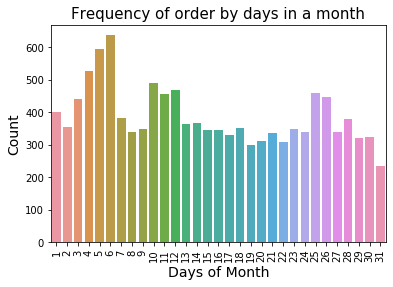

In [27]:
#Frequency of order by days of the month
sns.countplot(x='Day',data=df)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days of Month', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by days in a month", fontsize=15)
plt.show()

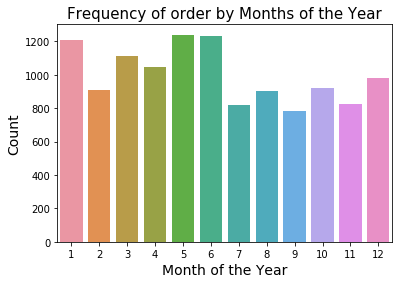

In [18]:
#Frequency of order by Month of the Years
sns.countplot(x='Month',data=df)
plt.xlabel('Month of the Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Frequency of order by Months of the Year", fontsize=15)
plt.show()

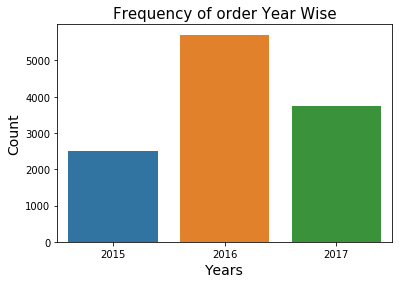

In [19]:
#Frequency of order Year Wise
sns.countplot(x='Year',data=df)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Frequency of order Year Wise", fontsize=15)
plt.show()

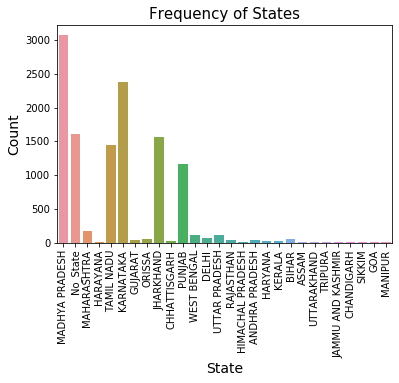

In [26]:
#Frequency of States:
sns.countplot(x='State',data=df)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency of States", fontsize=15)
plt.show()

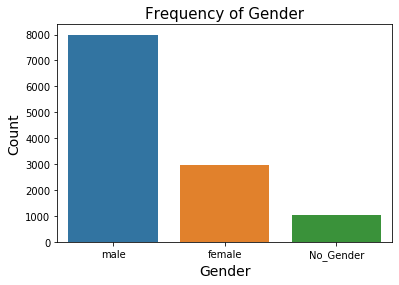

In [21]:
#Frequency of Gender
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Frequency of Gender", fontsize=15)
plt.show()

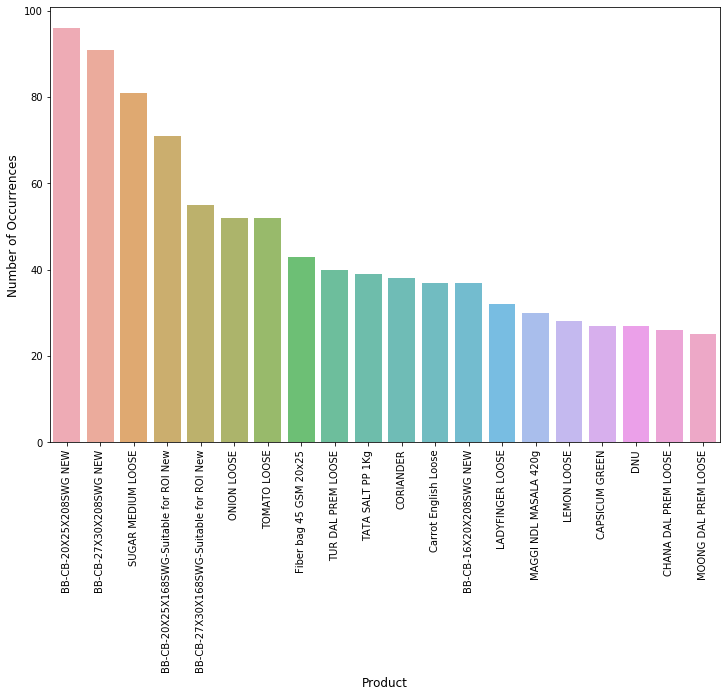

In [25]:
cnt_srs = df['product_description'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()